# Hybrid Switching
***
The Hybrid Switching solver is designed to allow a model's species to be represented dynamically as either continuous or stochastic throughout the simulation.  This solver will represent a reaction channel deterministically at high populations in order to favor performance, and will automatically switch to a stochastic representation at lower populations.  This allows for substantial run-time improvements over the SSA, minimizing the loss of stochastic accuracy.  
  
There is no special setup for the standard case of using this switching mechanism, however for cases where a particular species should always be represented as 'stochastic' or always represented as 'continuous,' the GillesPy2.species can be constructed with kwarg 'mode' locking that into place.  

**mode='dynamic'(default) - allows for hybrid switching  
mode='continuous' - forces a species to be modeled continuously/deterministically  
mode='discrete' - forces a species to be modeled discretely/stochastically**  

Ex:  
A = GillesPy2.Species(name='A', initial_value=400, mode='continuous')
***
## Setup the Environment
***

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../..')))

MatPlotLib is used for creating custom visualizations

In [3]:
import matplotlib.pyplot as plt

In [4]:
import gillespy2

In [5]:
import gillespy2.solvers.numpy.tau_hybrid_solver

***
## Create the Automatic Switching Model
***

In [17]:
def create_automatic_switch_example(parameter_values=None, tol=None):
    # Initialize Model
    model = gillespy2.Model(name="Automatic Switch Example")

    # Define Variables (GillesPy2.Species)
    if tol is None:
        A = gillespy2.Species(name='A', initial_value=400  )
        B = gillespy2.Species(name='B', initial_value=10000)
        C = gillespy2.Species(name='C', initial_value=10000)
    else:
        A = gillespy2.Species(name='A', initial_value=400  , switch_tol=tol)
        B = gillespy2.Species(name='B', initial_value=10000, switch_tol=tol)
        C = gillespy2.Species(name='C', initial_value=10000, switch_tol=tol)

    # Add Variables to Model
    model.add_species([A, B, C])
    
    # Define Parameters
    k1 = gillespy2.Parameter(name='k1', expression= 3e-4)
    k2 = gillespy2.Parameter(name='k2', expression= 0.5e-2)
    k3 = gillespy2.Parameter(name='k3', expression = 2e-1)
    
    # Add Parameters to Model
    model.add_parameter([k1, k2, k3])

    # Define Reactions
    r1 = gillespy2.Reaction(name="r1",reactants={'A': 1, 'B': 1}, products={'B': 1, 'C': 1}, rate='k1')
    r2 = gillespy2.Reaction(name="r2",reactants={'B': 1}, products={}, rate='k2')
    r3 = gillespy2.Reaction(name="r3",reactants={'C': 1}, products={'A': 1}, rate='k3')

    # Add Reactions to Model
    model.add_reaction([r1, r2, r3])
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=600, num_points=601)
    
    # Set Model Timespan
    model.timespan(tspan)
    for k,v in model.listOfSpecies.items():
        print(f"\t{k} {v.switch_tol}")
    return model

In [28]:
def create_automatic_switch_min_example(parameter_values=None, max_stoch_pop=100):
    # Initialize Model
    model = gillespy2.Model(name="Automatic Switch Example")

    # Define Variables (GillesPy2.Species)
    A = gillespy2.Species(name='A', initial_value=400, switch_min=max_stoch_pop)
    B = gillespy2.Species(name='B', initial_value=10000, switch_min=max_stoch_pop)
    C = gillespy2.Species(name='C', initial_value=10000, switch_min=max_stoch_pop)
    
    # Add Variables to Model
    model.add_species([A, B, C])

    # Define Parameters
    k1 = gillespy2.Parameter(name='k1', expression= 3e-4)
    k2 = gillespy2.Parameter(name='k2', expression= 0.5e-2)
    k3 = gillespy2.Parameter(name='k3', expression = 2e-1)
    
    # Add Parameters to Model
    model.add_parameter([k1, k2, k3])

    # Define Reactions
    r1 = gillespy2.Reaction(name="r1",reactants={'A': 1, 'B': 1}, products={'B': 1, 'C': 1}, rate='k1')
    r2 = gillespy2.Reaction(name="r2",reactants={'B': 1}, products={}, rate='k2')
    r3 = gillespy2.Reaction(name="r3",reactants={'C': 1}, products={'A': 1}, rate='k3')

    # Add Reactions to Model
    model.add_reaction([r1, r2, r3])
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=600, num_points=601)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [8]:
model_cv = create_automatic_switch_example(tol=0.005)

CPU times: user 19 s, sys: 150 ms, total: 19.2 s
Wall time: 19.2 s


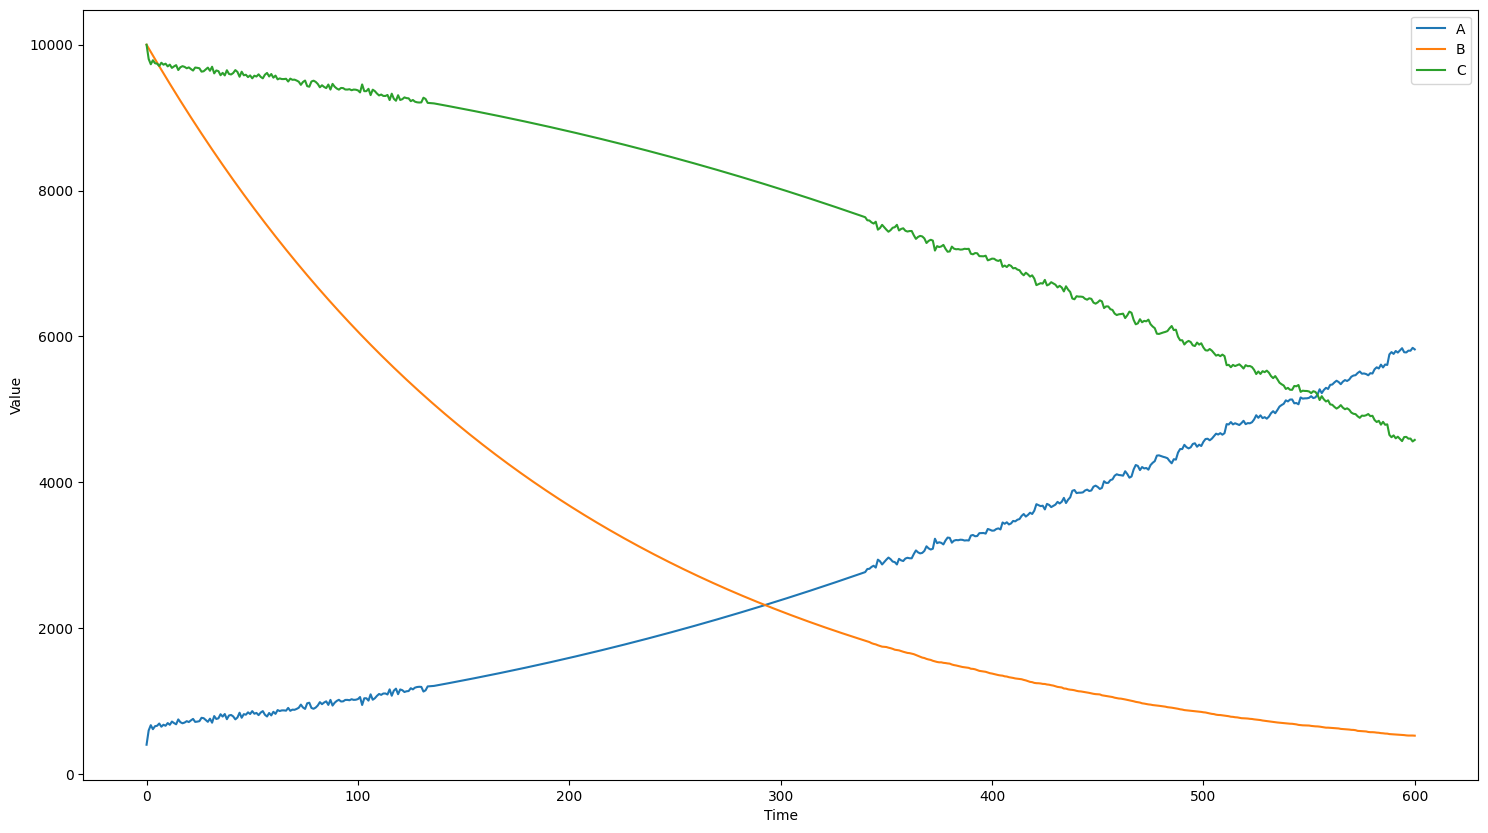

In [9]:
%time resultsP_cv = model_cv.run(solver=gillespy2.TauHybridSolver)
resultsP_cv.plot()

In [10]:
resultsP_cv.plotplotly()

	A 0.005
	B 0.005
	C 0.005
CPU times: user 19.6 s, sys: 241 ms, total: 19.9 s
Wall time: 19.9 s


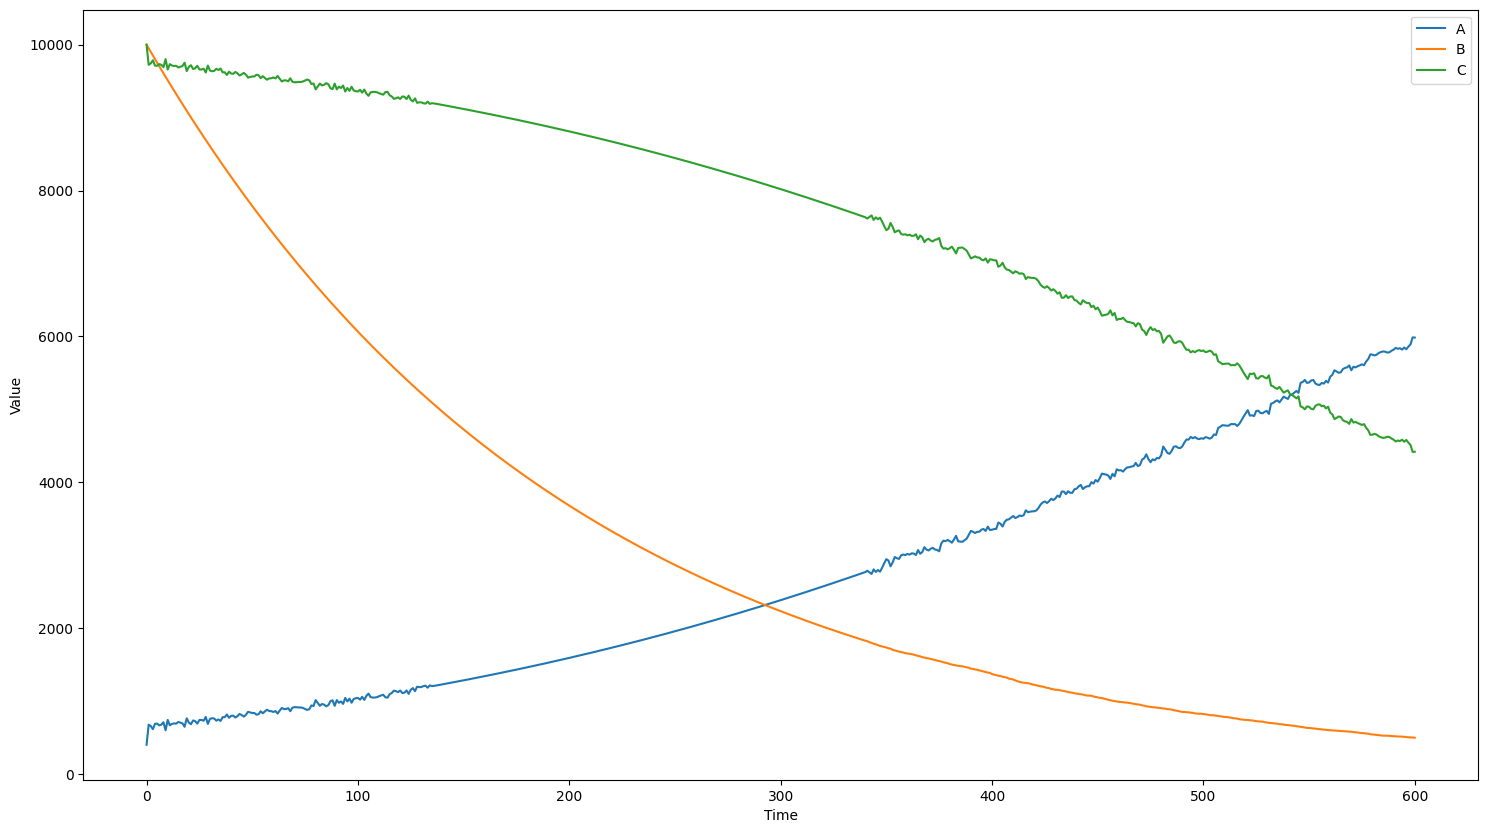

In [20]:
model_cv_default = create_automatic_switch_example()
%time resultsP_cv_default = model_cv_default.run(solver=gillespy2.TauHybridSolver)
resultsP_cv_default.plot()

	A 0.001
	B 0.001
	C 0.001
CPU times: user 18.5 s, sys: 67.6 ms, total: 18.5 s
Wall time: 18.5 s


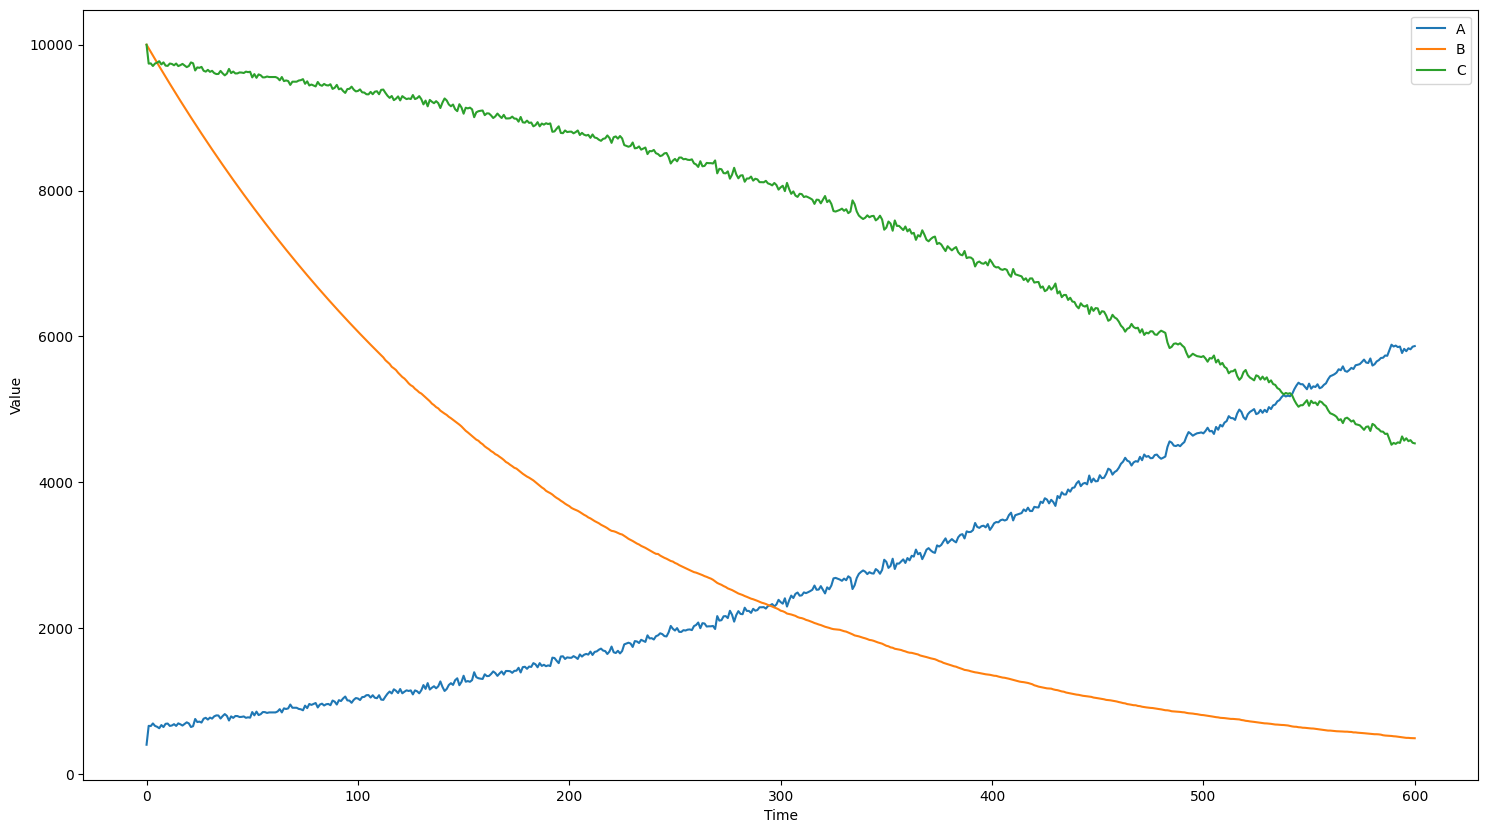

In [21]:
model_cv_default = create_automatic_switch_example(tol=0.001)
%time resultsP_cv_default = model_cv_default.run(solver=gillespy2.TauHybridSolver)
resultsP_cv_default.plot()

	A 0.0025
	B 0.0025
	C 0.0025
CPU times: user 20.1 s, sys: 87.8 ms, total: 20.1 s
Wall time: 20.1 s


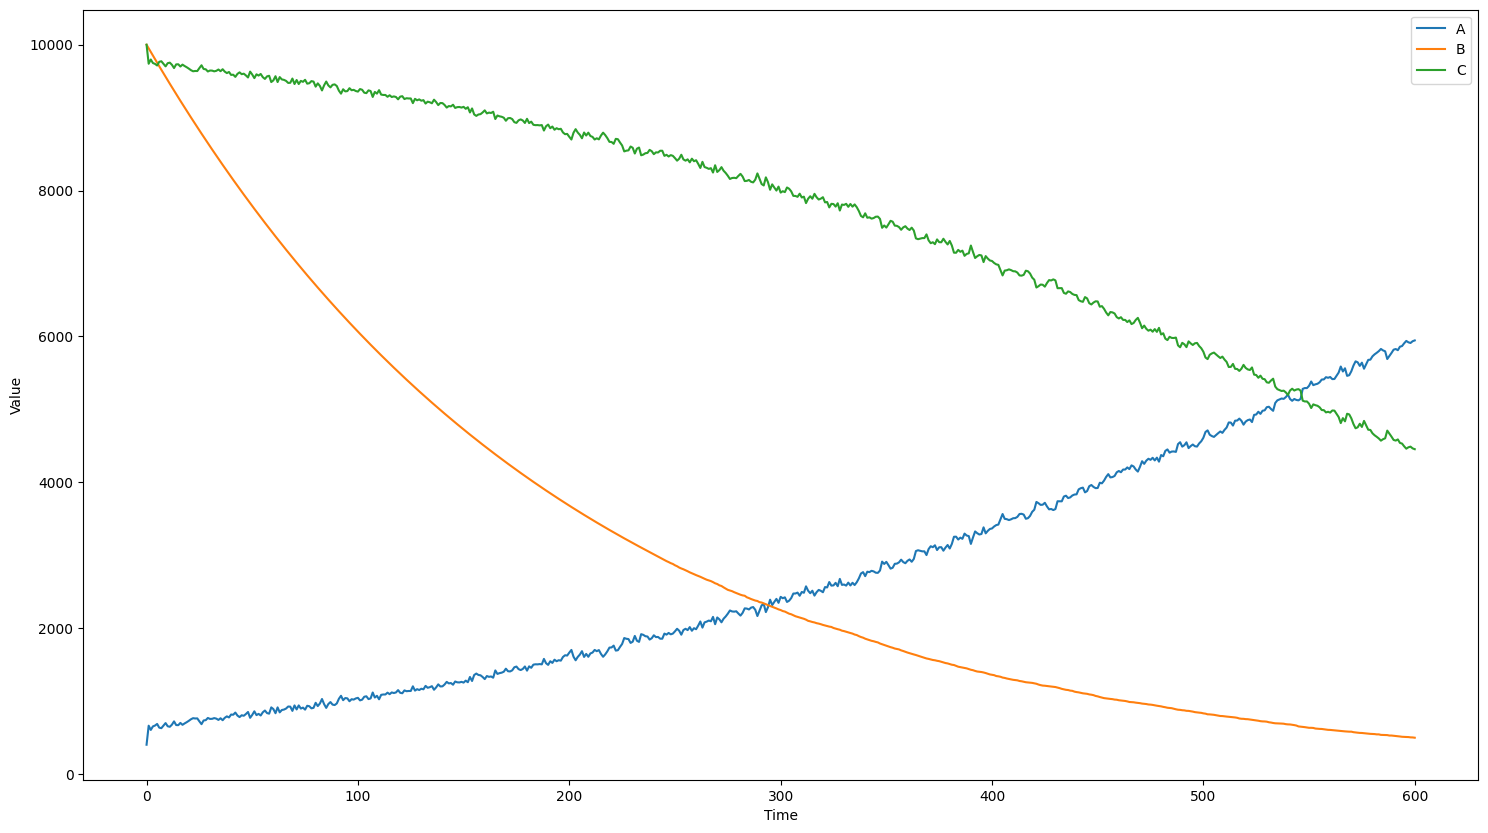

In [23]:
model_cv_default = create_automatic_switch_example(tol=0.0025)
%time resultsP_cv_default = model_cv_default.run(solver=gillespy2.TauHybridSolver)
resultsP_cv_default.plot()

	A 0.004
	B 0.004
	C 0.004
CPU times: user 20.9 s, sys: 140 ms, total: 21.1 s
Wall time: 21.1 s


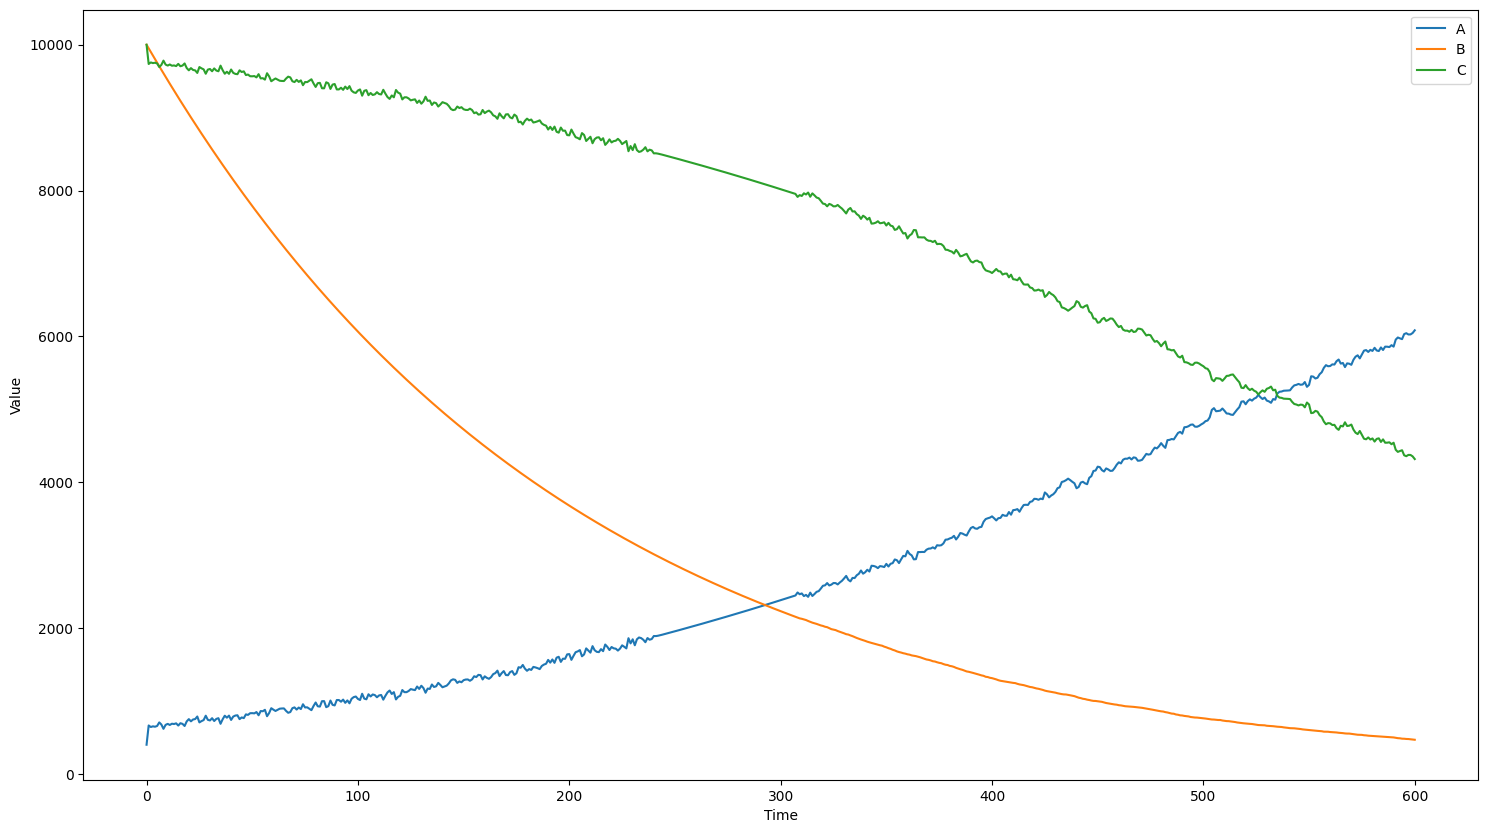

In [25]:
model_cv_default = create_automatic_switch_example(tol=0.004)
%time resultsP_cv_default = model_cv_default.run(solver=gillespy2.TauHybridSolver)
resultsP_cv_default.plot()

	A 0.006
	B 0.006
	C 0.006
CPU times: user 22.6 s, sys: 252 ms, total: 22.9 s
Wall time: 22.9 s


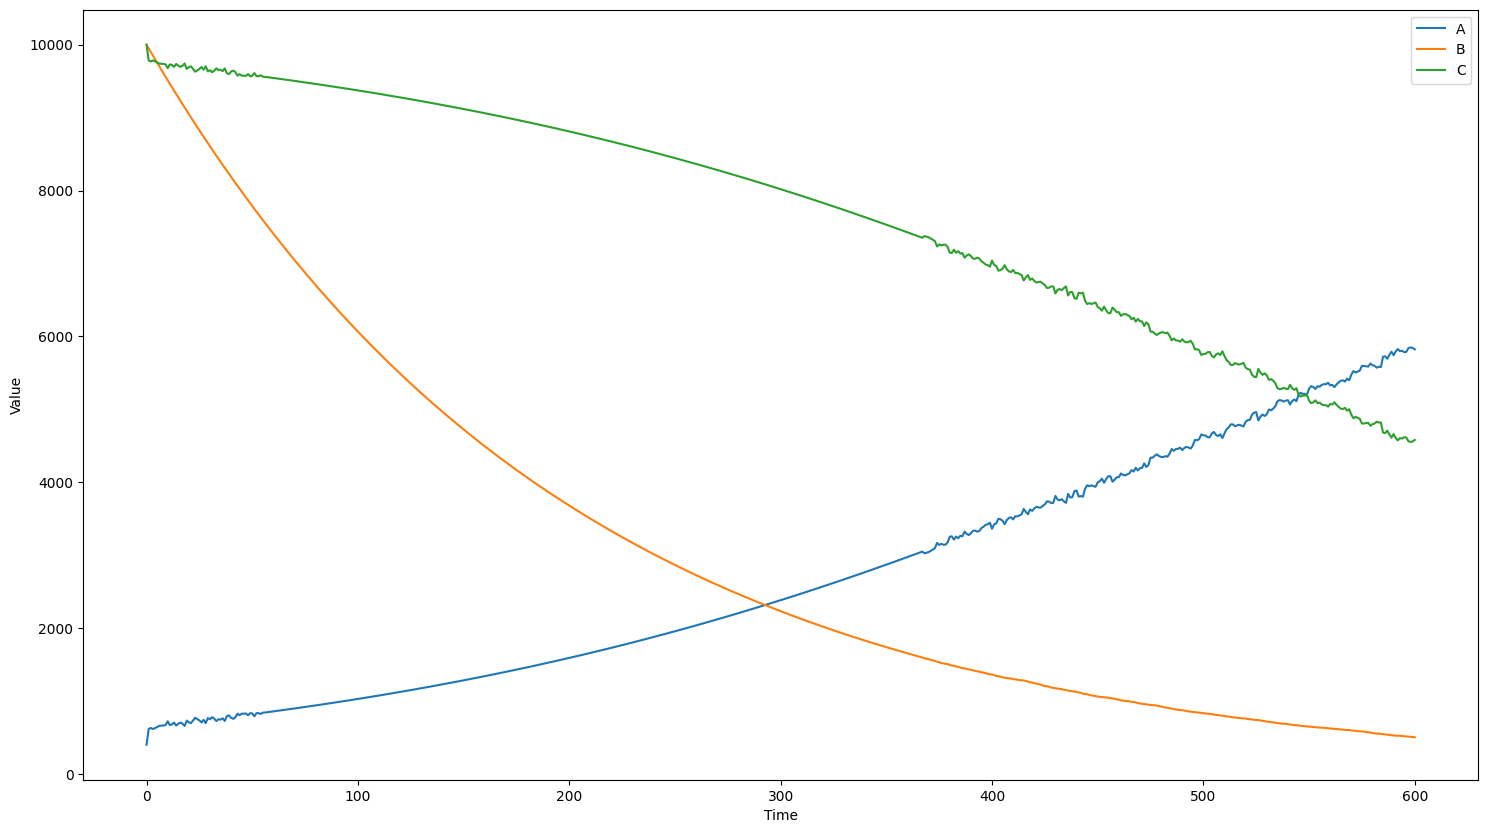

In [26]:
model_cv_default = create_automatic_switch_example(tol=0.006)
%time resultsP_cv_default = model_cv_default.run(solver=gillespy2.TauHybridSolver)
resultsP_cv_default.plot()

	A 0.0075
	B 0.0075
	C 0.0075
CPU times: user 19 s, sys: 228 ms, total: 19.3 s
Wall time: 19.3 s


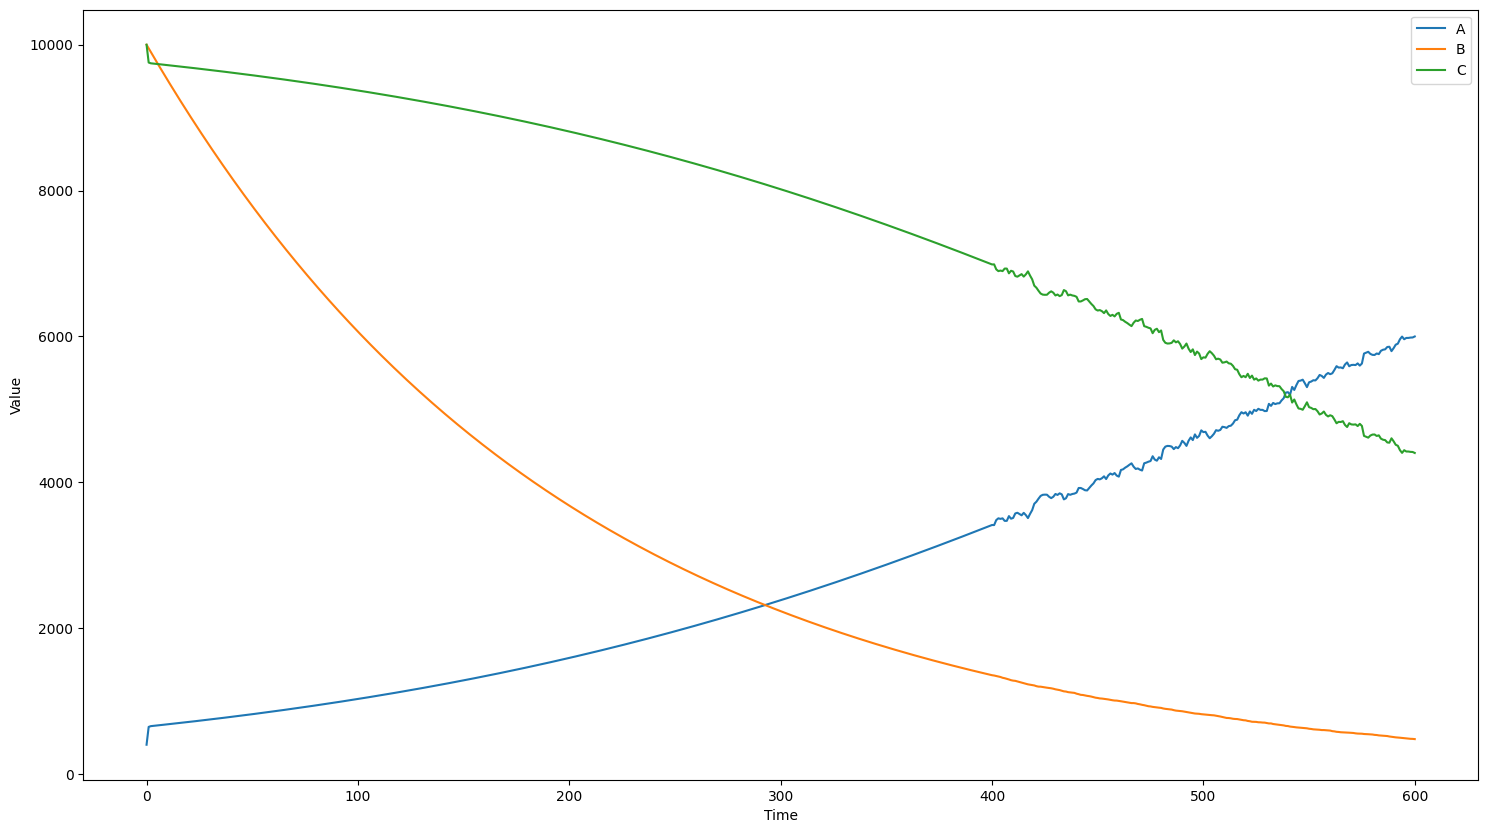

In [24]:
model_cv_default = create_automatic_switch_example(tol=0.0075)
%time resultsP_cv_default = model_cv_default.run(solver=gillespy2.TauHybridSolver)
resultsP_cv_default.plot()

	A 0.01
	B 0.01
	C 0.01
CPU times: user 17.4 s, sys: 204 ms, total: 17.6 s
Wall time: 17.6 s


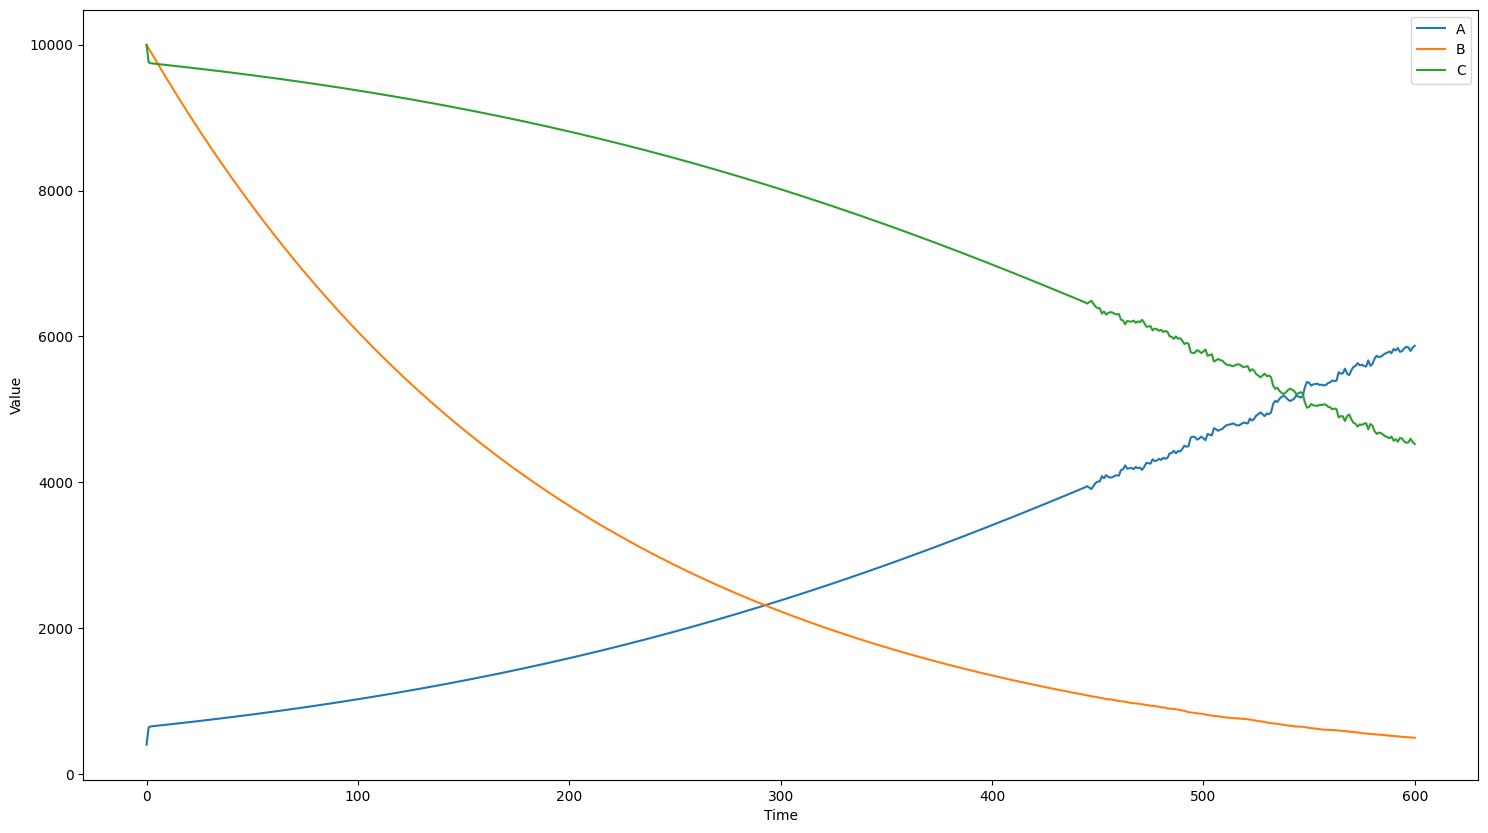

In [22]:
model_cv_default = create_automatic_switch_example(tol=0.01)
%time resultsP_cv_default = model_cv_default.run(solver=gillespy2.TauHybridSolver)
resultsP_cv_default.plot()

In [ ]:
#%time resultsC_cv = model_cv.run(solver=gillespy2.TauHybridCSolver)
solver_cv=gillespy2.TauHybridCSolver(model=model_cv)
%time resultsC_cv = solver_cv.run()             
resultsC_cv.plot()

In [ ]:
resultsC_cv.plotplotly()

In [29]:
model_min = create_automatic_switch_min_example(max_stoch_pop=1500)

CPU times: user 19.2 s, sys: 116 ms, total: 19.3 s
Wall time: 19.3 s


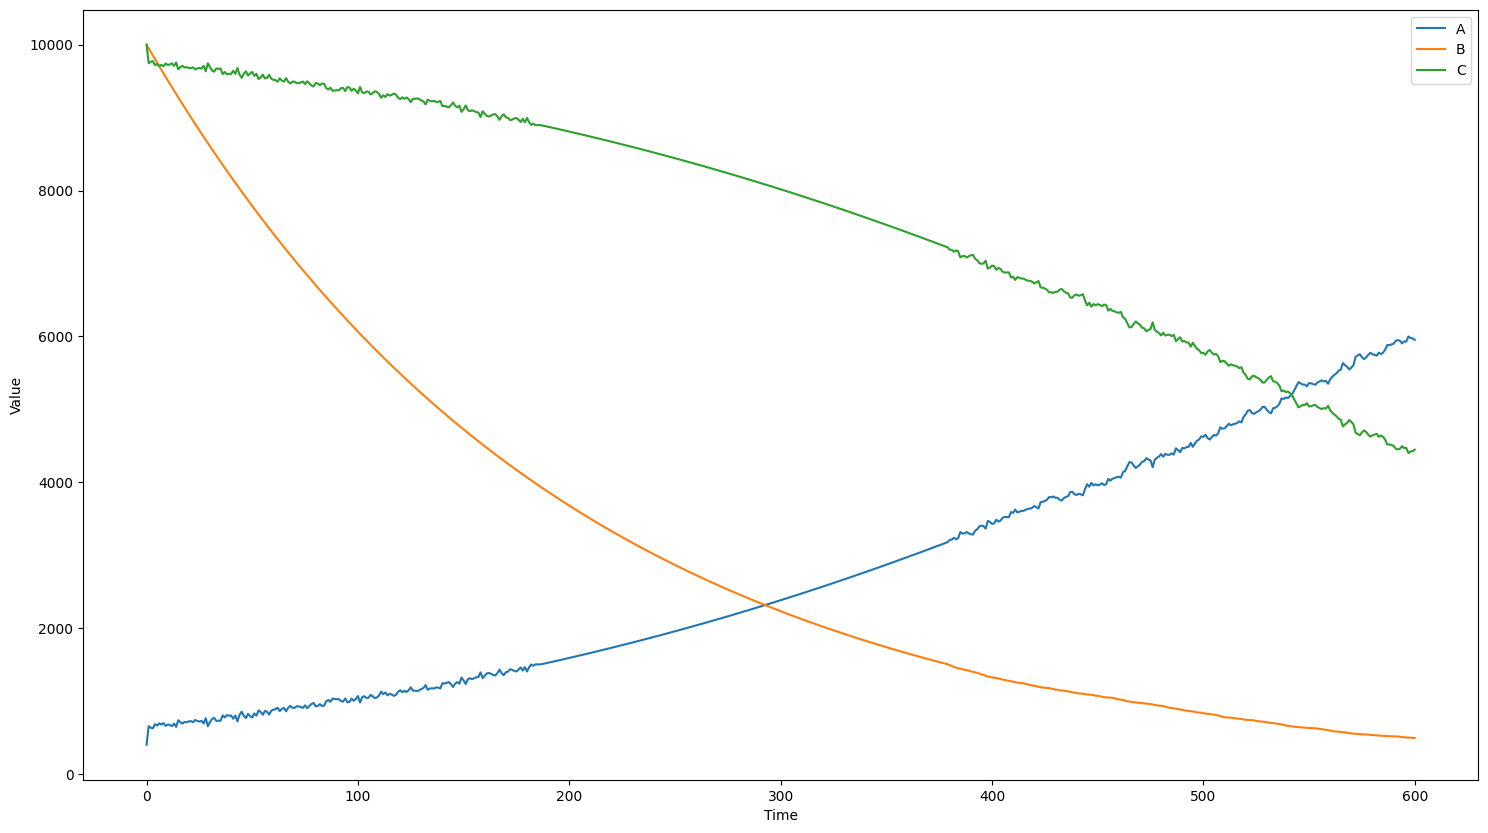

In [30]:
%time resultsP_min = model_min.run(solver=gillespy2.TauHybridSolver)
resultsP_min.plot()

In [ ]:
#%time resultsC_min = model_min.run(solver=gillespy2.TauHybridCSolver)
solver=gillespy2.TauHybridCSolver(model=model_min)
%time resultsC_min = solver.run()             
resultsC_min.plot()

In [ ]:
raise Exception('stop')

***
## OLD -- Run the Simulations
***
The hybrid switching condition is based on a coefficient of variance for each species.  The error threshold for this condition can be user modified by instantiating the solver, and calling the run function from it, rather than the solver.  
  
The default value is `0.03` and is a threshold to the coefficient of variance for each species at the selected forward step (t + tau).

In [ ]:
%time tau_hybrid_results = model.run(algorithm="Tau-Hybrid")

Additionally, the `tau_tol` can be modified to result in extremely fast simulations.

In [ ]:
%time results2 = model.run(algorithm="Tau-Hybrid", tau_tol=0.04)

In [ ]:
%time results3 = model.run()

***
## Visualizations
***

In [ ]:
tau_hybrid_results.plot()

In [ ]:
results2.plot()

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Comparison of Hybrid Switching Results default vs higher tau + hybrid tolerance')
for species in results2[0]:
    if species == 'time': continue
    plt.plot(results2[0]['time'], results2[0][species], label='High tol-{0}'.format(species))
for species in tau_hybrid_results[0]:
    if species == 'time': continue
    plt.plot(tau_hybrid_results[0]['time'], tau_hybrid_results[0][species], label='Default tol-{0}'.format(species))
    plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Comparison of Hybrid Switching Results SSA vs higher tau + hybrid tolerance')
for species in results2[0]:
    if species == 'time': continue
    plt.plot(results2[0]['time'], results2[0][species], label='High tol-{0}'.format(species))
for species in results3[0]:
    if species == 'time': continue
    plt.plot(results3[0]['time'], results3[0][species], label='SSA-{0}'.format(species))
    plt.legend(loc='best')